In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from func import distance

In [2]:
df=pd.read_csv('Data/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 9)

In [5]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [9]:
#eliminamos columnas que no nos dicen na´ asi como las filas con Nan

In [10]:
df=df.drop(['key','Unnamed: 0'],axis = 1)

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
#transform pickup_datetime[object] to datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [14]:
df['pickup_datetime'].head()

0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [15]:
df['month']=df['pickup_datetime'].dt.month
df['weekday']=df['pickup_datetime'].dt.day_name()
df['day']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour
df['minute']=df['pickup_datetime'].dt.minute

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,day,hour,minute
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,5,Thursday,7,19,52
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,7,Friday,17,20,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,8,Monday,24,21,45
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,6,Friday,26,8,22
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,8,Thursday,28,17,47


In [17]:
#Viendo que no esta especialmente ordenado el dataset, para que sea más comprensible para el humano

In [18]:
df.sort_values(by='pickup_datetime', ascending=True, inplace=True, ignore_index=True)

In [19]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,day,hour,minute
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,1,Thursday,1,1,15
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,1,Thursday,1,1,59
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,1,Thursday,1,2,5
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,1,Thursday,1,2,9
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,1,Thursday,1,2,13


In [20]:
df.tail()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,day,hour,minute
199994,18.5,2015-06-30 22:57:53+00:00,-73.971703,40.782207,-73.943680,40.827991,2,6,Tuesday,30,22,57
199995,25.5,2015-06-30 23:16:42+00:00,-74.001099,40.730961,-73.957123,40.806908,2,6,Tuesday,30,23,16
199996,20.0,2015-06-30 23:31:06+00:00,-73.999962,40.733135,-73.962448,40.773041,4,6,Tuesday,30,23,31
199997,8.5,2015-06-30 23:33:33+00:00,-73.980988,40.762020,-73.960083,40.770531,1,6,Tuesday,30,23,33
199998,27.0,2015-06-30 23:40:39+00:00,-73.984795,40.751411,-73.927765,40.706287,1,6,Tuesday,30,23,40


In [24]:
#Generamos una nueva columna con la distancia recorrida

In [25]:
df['distance'] = distance(df['pickup_longitude'].to_numpy(),df['pickup_latitude'].to_numpy(),
                            df['dropoff_longitude'].to_numpy(), df['dropoff_latitude'].to_numpy())

In [26]:
#Ahora pasamos a ver la distribución de cada una de las columnas

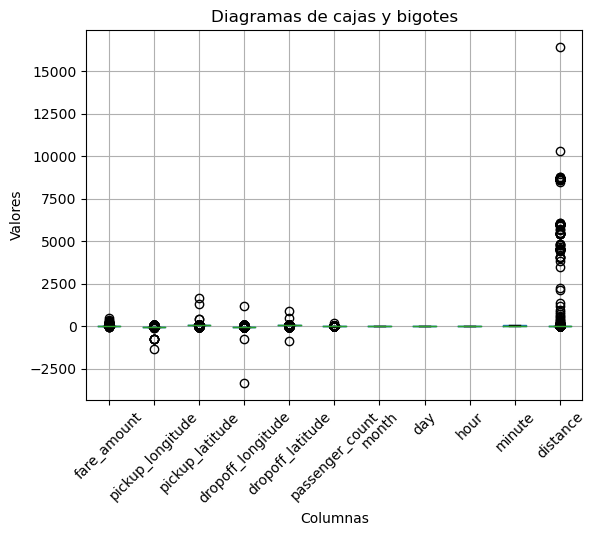

In [27]:
# Dibujamos los diagramas de cajas y bigotes
df.boxplot()

# Añadimos título y etiquetas a los ejes
plt.title('Diagramas de cajas y bigotes')
plt.xlabel('Columnas')
plt.xticks(rotation=45)

plt.ylabel('Valores')

# Mostramos el gráfico
plt.show()

In [28]:
#Analizamos las siguientes columnas

In [29]:
df.fare_amount.describe()

count    199999.000000
mean         11.359892
std           9.901760
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

In [30]:
#Valores negativos no tienen cabida en fare
#fare>2.5 al tener un fee minimo por viaje


In [ ]:
#distancia recorrida >0 y no vamos a considerar distancias mayores a 400km
#(al poner uber un tiempo max de viaje de 4 horas y ser unos 100km/h la velocidad maxima de la carretera con mayor limite. )

In [31]:
df.passenger_count.unique()

array([  2,   1,   4,   5,   3,   6,   0, 208], dtype=int64)

In [ ]:
#tampoco tiene sentido más de 6 ocupantes por vehiculo, se asume que 0 si ya que uber tambien un servicio de delivery.

In [32]:
df.drop(df[df['passenger_count'] > 6].index, axis=0, inplace = True)
df.drop(df[df['fare_amount'] < 2.5].index, axis=0, inplace = True)
df.drop(df[df['distance'] > 400].index, axis=0, inplace = True)
df.drop(df[df['distance'] == 0].index, axis=0, inplace = True)
df.dropna(axis=0,inplace=True)

In [33]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,weekday,day,hour,minute,distance
0,8.5,2009-01-01 01:15:22+00:00,-73.981918,40.779456,-73.957685,40.771043,2,1,Thursday,1,1,15,2.244765
1,13.0,2009-01-01 01:59:17+00:00,-73.983759,40.721389,-73.994833,40.687179,2,1,Thursday,1,1,59,3.916842
2,10.6,2009-01-01 02:05:03+00:00,-73.956635,40.771254,-73.991528,40.749778,2,1,Thursday,1,2,5,3.786736
3,12.2,2009-01-01 02:09:13+00:00,-73.984605,40.728020,-73.955746,40.776830,1,1,Thursday,1,2,9,5.946957
4,11.0,2009-01-01 02:13:41+00:00,-73.980127,40.737425,-74.009544,40.726025,4,1,Thursday,1,2,13,2.784022
